In [28]:
import pandas as pd
from matplotlib import pyplot as  plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
pd.set_option('display.max_colwidth', None)

In [30]:
df1= pd.read_csv('MaestroTirosKingsLeague-Split1_2023.csv',sep=';')
df = pd.read_csv( 'MaestroTirosKingsLeague-Split2_2023.csv',sep=';')
pub= pd.read_csv('MaestroTirosKingsCup-2023.csv',sep=';')
q=pd.read_csv('MaestroTirosQueensLeague-Split1_2023.csv',sep=';')
pub=pd.concat([pub,df1,df], ignore_index=True)
t=pd.read_csv('MaestroTirosKingdomCup-2023.csv', sep=';')

#MaestroTirosQueensCup-2023.csv
#MaestroTirosKingsCup-2023.csv
#df=df[['goal_x','goal_y','shot_outcome']]
pub['goal_x']=pub['goal_x'].str.replace(',','.').astype(float)
pub['goal_y']=pub['goal_y'].str.replace(',','.').astype(float)
pub['xG']=pub['xG'].str.replace(',','.').astype(float)
pub = pub[(pub['goal_x']>0)&(pub['goal_x']<6)&(pub['goal_y']<2)]
df1['goal_x']=df1['goal_x'].str.replace(',','.').astype(float)
df1['goal_y']=df1['goal_y'].str.replace(',','.').astype(float)
df1['xG']=df1['xG'].str.replace(',','.').astype(float)
df1=df1[(df1['goal_x']>0)&(df1['goal_x']<6)&(df1['goal_y']<2)]
df['xG']=df['xG'].str.replace(',','.').astype(float)
df['goal_x']=df['goal_x'].str.replace(',','.').astype(float)
df['goal_y']=df['goal_y'].str.replace(',','.').astype(float)
df=df[(df['goal_x']>0)&(df['goal_x']<6)&(df['goal_y']<2)]
t['xG']=t['xG'].str.replace(',','.').astype(float)
t['goal_x']=t['goal_x'].str.replace(',','.').astype(float)
t['goal_y']=t['goal_y'].str.replace(',','.').astype(float)
t=t[(t['goal_x']>0)&(t['goal_x']<6)&(t['goal_y']<2)]
t=t[(t['period']=='2')&(t['period']!='TB')]
pub=pd.concat([pub,t],ignore_index=True)
df1=pd.concat([df, df1], ignore_index=True)
pub=pub[(pub['period']!='TB')&(pub['period']!='ET')]
df1=df1[df1['shot_outcome']!='Block']
pub=pub[pub['shot_outcome']!='Block']
#df1=pd.read_csv('maestro_tiros (2).csv',sep=';')
#df1=df1[df1['season']!='Kings Cup - 2023']
#df1['goal_x']=df1['goal_x'].str.replace(',','.').astype(float)
#df1['goal_y']=df1['goal_y'].str.replace(',','.').astype(float)
#df1['xG']=df1['xG'].str.replace(',','.').astype(float)
#df1=df1[(df1['goal_x']>0)&(df1['goal_x']<6)&(df1['goal_y']<2)]

In [ ]:
pub=pub[(pub['period']!='TB')&(pub['period']!='ET')]

### xGOT (Expected Goals On Target):
Es una métrica que mide la probabilidad de que un portero reciba un gol, combinando la probabilidad de gol del disparo (xG) con el lugar de la portería en el que entraría el balón. A mejor calidad del disparo y ubicación más ajustada a las esquinas, más alto será el valor en xGOT que tendrá que evitar un portero.



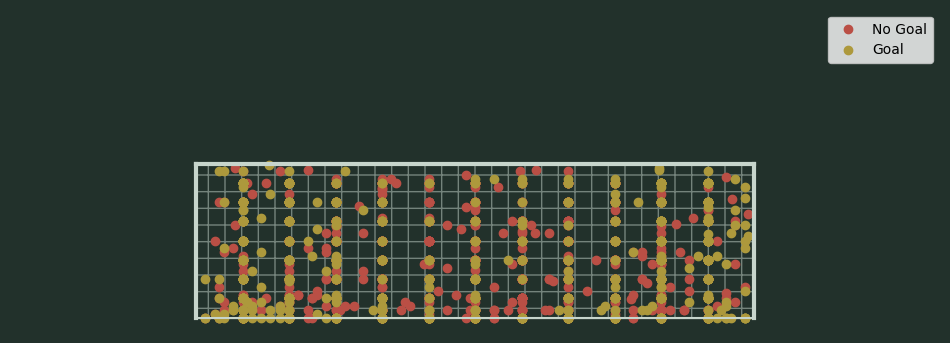

In [7]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='#22312b')
fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([0,6],[0,0], color='#c7d5cc', linewidth=1.5)
plt.plot([0,6],[2,2], color='#c7d5cc', linewidth=3)
plt.plot([0,0],[0,2], color='#c7d5cc', linewidth=3)
plt.plot([6,6],[0,2], color='#c7d5cc', linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((0, 0), 6, 2, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.5))

plt.axis('off')

goal_mask = df1['shot_outcome'] == 'Goal'
no_goal_mask = df1['shot_outcome'] != 'Goal'
sc1 = plt.scatter(df1[no_goal_mask]['goal_x'], df1[no_goal_mask]['goal_y'],
                    marker='o', color='#ba4f45', label='No Goal')
sc2 = plt.scatter(df1[goal_mask]['goal_x'], df1[goal_mask]['goal_y'],
                    marker='o', color='#ad993c', label='Goal')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=-2, xmax=8)
plt.legend()

plt.show()

In [8]:
df1['goal'] = df1.apply(lambda row:1 if row['shot_outcome']=='Goal' else 0, axis=1)
df1['end_y_center'] = df1.apply(lambda row:3-row['goal_x'], axis=1)
df1['end_z_center'] = df1.apply(lambda row:1-row['goal_y'], axis=1)

In [9]:
df['goal'] = df.apply(lambda row:1 if row['shot_outcome']=='Goal' else 0, axis=1)
df['end_y_center'] = df.apply(lambda row:3-row['goal_x'], axis=1)
df['end_z_center'] = df.apply(lambda row:1-row['goal_y'], axis=1)

In [10]:
pub['goal'] = pub.apply(lambda row:1 if row['shot_outcome']=='Goal' else 0, axis=1)
pub['end_y_center'] = pub.apply(lambda row:3-row['goal_x'], axis=1)
pub['end_z_center'] = pub.apply(lambda row:1-row['goal_y'], axis=1)

In [11]:
fig = alt.Chart(df1).mark_point().encode(x='end_y_center',y='goal')

fig + fig.transform_regression('end_y_center','goal').mark_line()


alt.LayerChart(...)

In [12]:
fig = alt.Chart(df1).mark_point().encode(x='end_z_center',y='goal')

fig + fig.transform_regression('end_z_center','goal').mark_line()

alt.LayerChart(...)

In [13]:
SEED = 42
X_cols = ['xG','end_y_center', 'end_z_center']
X = df1[['xG','end_y_center', 'end_z_center']]
y = df1['goal']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[X_cols] = scaler.fit_transform(X_train[X_cols])
X_test_scaled[X_cols] = scaler.transform(X_test[X_cols])

In [14]:
# Logistic Regression model
xgot_model = LogisticRegression(random_state=SEED)
xgot_model.fit(X_train_scaled, y_train)
y_pred = xgot_model.predict_proba(X_test_scaled)[:,-1].round(2)
# metrics.r2_score(y, y_pred)

In [15]:
test_df = pd.concat((X_test, y_test), axis=1)
test_df['XGOT'] = y_pred
test_df

xG  end_y_center  end_z_center  goal  XGOT
940   0.0659          -2.0          0.75     1  0.23
141   0.0474           0.5          1.00     0  0.21
1590  0.0036           0.9         -0.80     0  0.20
1776  0.1187           1.5          0.50     0  0.27
792   0.1089           2.5         -0.25     1  0.27
...      ...           ...           ...   ...   ...
73    0.2059          -2.0          0.50     0  0.36
1523  0.0882           2.0          0.75     1  0.24
1824  0.0833          -2.5          0.75     0  0.24
968   0.2402          -1.5          0.25     1  0.40
1291  0.2059           1.5          1.00     0  0.34

[531 rows x 5 columns]

In [16]:
model_results_test = test_df.groupby(test_df['XGOT'].round(1)).agg(
    shots=('XGOT', 'count'),
    goals=('goal', 'sum'),
    goal_ratio=('goal', 'mean')
).reset_index()

model_results_test

XGOT  shots  goals  goal_ratio
0   0.2    170     21    0.123529
1   0.3    233     87    0.373391
2   0.4     31     20    0.645161
3   0.5      6      2    0.333333
4   0.6     30     16    0.533333
5   0.7     19      7    0.368421
6   0.8     25     20    0.800000
7   0.9     17     15    0.882353

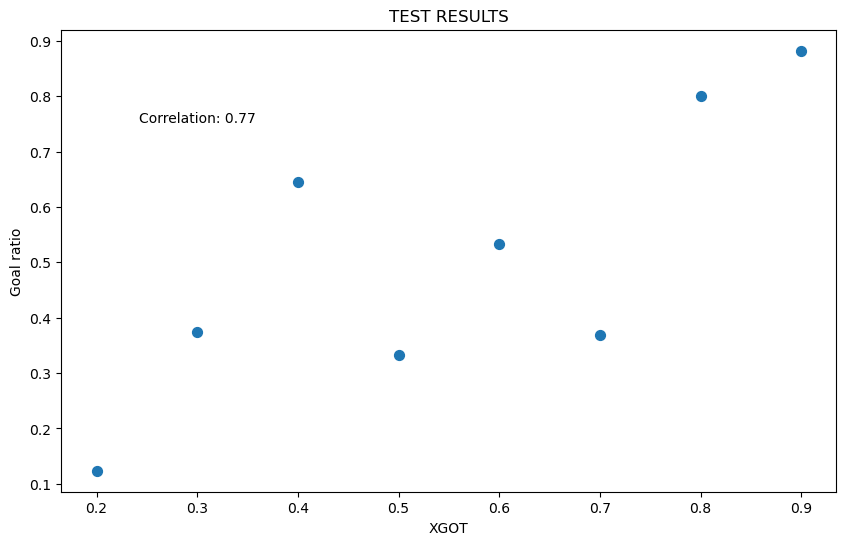

In [17]:
import matplotlib.pyplot as plt

correlation_test = model_results_test['XGOT'].corr(model_results_test['goal_ratio'])

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(model_results_test['XGOT'], model_results_test['goal_ratio'], s=50)
plt.xlabel("XGOT")
plt.ylabel("Goal ratio")
plt.title("TEST RESULTS")
plt.text(0.1, 0.8, f"Correlation: {correlation_test:.2f}", transform=plt.gca().transAxes)
plt.show()

In [18]:
def calculate_xgot(row):
        X = row[['xG','end_y_center','end_z_center']]
        X =scaler.transform(X)
        xgot = xgot_model.predict_proba(X)[:, 1]
        return xgot
        
    

In [19]:
pub['XGOT']=calculate_xgot(pub)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Goles Evitados:
Los xGOT se utilizan para evaluar el rendimiento de los porteros calculando cuantos goles evitan, alejandonos de métricas basicas como cantidad de paradas o goles recibidos las cuales no son claramente representativos del rendimiento de un portero.

Los goles evitados se calculan con la siguiente formula: Goles que se esperaban que encajara (xGOT) - Goles encajados

In [20]:
partidos_jugados = pub.groupby(['gk_player_name', 'season'])['match_id'].nunique()
partidos_totales = partidos_jugados.groupby('gk_player_name').sum()

In [24]:
por= pub.groupby('gk_player_name')['XGOT'].sum().to_frame()
por['goles']=pub[(pub['shot_outcome']=='Goal')|(pub['shot_outcome']=='OwnGoal')].groupby('gk_player_name').size()
por['goles evitados']=(pub.groupby('gk_player_name')['XGOT'].sum()-por['goles']).sort_values(ascending=False)
por['xgot/goles']=(pub.groupby('gk_player_name')['XGOT'].sum()/por['goles']).sort_values(ascending=False)
partidos_jugados = pub.groupby(['gk_player_name', 'season'])['match_id'].nunique()
por['partidos'] = partidos_jugados.groupby('gk_player_name').sum()
por['goles evitados/partido']=por['goles evitados']/por['partidos']

In [27]:
por.sort_values('goles evitados', ascending=False)

XGOT  goles  goles evitados  xgot/goles  partidos  \
gk_player_name                                                             
Briones           84.873844   62.0       22.873844    1.368933        34   
Segovia           86.039641   79.0        7.039641    1.089109        33   
Víctor Vidal      32.989868   26.0        6.989868    1.268841        15   
Dani Pérez       106.404247  102.0        4.404247    1.043179        38   
Alex Romero        5.176424    1.0        4.176424    5.176424         3   
Eloy Amoedo       12.021100    8.0        4.021100    1.502637         5   
P. Zapata         84.446481   81.0        3.446481    1.042549        34   
P. Lechuga        84.351643   81.0        3.351643    1.041378        33   
Alberto Arnalot   23.778649   21.0        2.778649    1.132317        10   
J. Ibañez         88.443001   86.0        2.443001    1.028407        31   
Sergi             41.117747   39.0        2.117747    1.054301        19   
José Juan         27.097385   25.0        2.097385    1.083895        14   
Iu Morral         35.040073   33.0        2.040073    1.061820        18   
Mario             21.170576   20.0        1.170576    1.058529         6   
A. De Castro       3.156290    2.0        1.156290    1.578145         1   
I. Pérez           0.909703    1.0       -0.090297    0.909703         1   
I. González        0.755815    1.0       -0.244185    0.755815         1   
C. Ubón            0.683673    1.0       -0.316327    0.683673         1   
Uri Pons           0.631620    1.0       -0.368380    0.631620         1   
Bueno              0.547362    1.0       -0.452638    0.547362         1   
I. Casillas        3.543861    4.0       -0.456139    0.885965         2   
B. Rovira          0.466949    1.0       -0.533051    0.466949         1   
Ibai Gómez         0.320582    1.0       -0.679418    0.320582         1   
R. Ledo            1.310699    2.0       -0.689301    0.655350         1   
E. Alvaro          0.295259    1.0       -0.704741    0.295259         1   
O. Rivero          0.286453    1.0       -0.713547    0.286453         1   
David López        0.264686    1.0       -0.735314    0.264686         1   
K. Honorato        1.260898    2.0       -0.739102    0.630449         1   
Javi Espinosa      0.241056    1.0       -0.758944    0.241056         1   
Pol Font           1.150378    2.0       -0.849622    0.575189         1   
J. Verdú           2.037011    3.0       -0.962989    0.679004         2   
S. Rodenas         3.942089    5.0       -1.057911    0.788418         4   
Gerard Vacas      25.872218   27.0       -1.127782    0.958230        13   
Arché              0.480058    2.0       -1.519942    0.240029         2   
Manuel Martin     25.423342   27.0       -1.576658    0.941605        13   
Capi              81.210450   83.0       -1.789550    0.978439        36   
M. Arus            6.907112    9.0       -2.092888    0.767457         7   
Ignacio           56.791286   59.0       -2.208714    0.962564        25   
Javi Verger        2.655857    5.0       -2.344143    0.531171         2   
Ricardo           62.696643   66.0       -3.303357    0.949949        22   
Cócera            70.029071   74.0       -3.970929    0.946339        31   
Sep               19.940387   25.0       -5.059613    0.797615        11   
X. Morales         5.784970   11.0       -5.215030    0.525906         5   
A. Garcia         15.496598   21.0       -5.503402    0.737933         7   
Iván Fajardo      10.477994   16.0       -5.522006    0.654875         6   
Joan Canet        38.301965   52.0      -13.698035    0.736576        14   
Coro               0.242569    NaN             NaN         NaN         1   
Fran Hernández     0.372539    NaN             NaN         NaN         1   
I. Nuevo           0.252843    NaN             NaN         NaN         1   
J. Ros             0.292023    NaN             NaN         NaN         1   
M. Reyes           0.271006    NaN             NaN         NaN         